Download data

In [1]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [2]:
# !ls gdrive/MyDrive/PED

In [3]:
import pandas
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('punkt')
%matplotlib inline

df = pandas.read_csv('../../reddit_wsb.csv')
df["body"] = df["body"].fillna('')
df["title"] = df["title"].fillna('')

df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name,is_self
0,Due to all the manipulation happening on sever...,4,l69fvk,https://www.reddit.com/r/wallstreetbets/commen...,2,1.611768e+09,Many trading platforms have disabled the abili...,Wed Jan 27 18:18:38 2021,0.75,False,/r/wallstreetbets/comments/l69fvk/due_to_all_t...,t3_l69fvk,True
1,Holding GME till the squeeze has squoze. 6421@21,1157,l87ci6,https://i.redd.it/20f2x4ehsce61.png,85,1.611962e+09,,Sat Jan 30 00:12:20 2021,0.99,False,/r/wallstreetbets/comments/l87ci6/holding_gme_...,t3_l87ci6,False
2,Going long on my dick,0,lc8dnh,https://www.reddit.com/r/wallstreetbets/commen...,7,1.612416e+09,A month ago I found out that I have a big dick...,Thu Feb 4 06:17:59 2021,0.39,False,/r/wallstreetbets/comments/lc8dnh/going_long_o...,t3_lc8dnh,True
3,"TASTYWORKS IS ALSO SETTING ""CERTAIN"" STOCKS TO...",3,l71knz,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611852e+09,"""Apex Clearing, who acts as the custodian of a...",Thu Jan 28 17:35:13 2021,1.00,False,/r/wallstreetbets/comments/l71knz/tastyworks_i...,t3_l71knz,True
4,PLEASE HELP THIS IS A DUMBASS FUCKING QUESTION,4,l70720,https://www.reddit.com/r/wallstreetbets/commen...,7,1.611849e+09,I\u2019ve been following for a couple years......,Thu Jan 28 16:45:57 2021,0.70,False,/r/wallstreetbets/comments/l70720/please_help_...,t3_l70720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,Damn.. with the government getting involved an...,0,l6b99w,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611772e+09,I don\u2019t have much.. but I\u2019d rather n...,Wed Jan 27 19:32:50 2021,0.36,False,/r/wallstreetbets/comments/l6b99w/damn_with_th...,t3_l6b99w,True
38904,DONT BE FOOLED BY PRICE DROP IN $AMC. THE VOLU...,16,l6zb4b,https://i.redd.it/c4xkr2zwa3e61.jpg,2,1.611847e+09,,Thu Jan 28 16:15:16 2021,0.90,False,/r/wallstreetbets/comments/l6zb4b/dont_be_fool...,t3_l6zb4b,False
38905,For everyone searching by new who wants to buy...,77,l70tgo,https://www.reddit.com/r/wallstreetbets/commen...,10,1.611850e+09,This is according to other users in the commen...,Thu Jan 28 17:09:14 2021,1.00,False,/r/wallstreetbets/comments/l70tgo/for_everyone...,t3_l70tgo,True
38906,Why buy GME now,0,lcgmi4,https://www.reddit.com/r/wallstreetbets/commen...,19,1.612448e+09,Can you retards explain to me why anyone shoul...,Thu Feb 4 15:20:37 2021,0.32,False,/r/wallstreetbets/comments/lcgmi4/why_buy_gme_...,t3_lcgmi4,True


In [4]:
import pickle
img_text = pickle.load(open("../../pickle/texts.pkl", "rb"))
print(img_text.keys())

dict_keys(['l0j2uy', 'l0jw5j', 'l0k6vs', 'l0k7wq', 'l0khnn', 'l0kvul', 'l0l9b3', 'l0lg6r', 'l0lhf6', 'l0lijo', 'l0lns6', 'l0lv51', 'l0m5vt', 'l0ml9k', 'l0mxg7', 'l0mxu6', 'l0mya0', 'l0n31j', 'l0nabp', 'l0ncm6', 'l0nczx', 'l0nkoa', 'l0nlvs', 'l0nqum', 'l0nset', 'l0ntch', 'l0nxdn', 'l0o3tx', 'l0o4ga', 'l0oa3i', 'l0odp0', 'l0ojlo', 'l0okp4', 'l0omc8', 'l0otzf', 'l0owfh', 'l0oxxg', 'l0oynb', 'l0p2a4', 'l0p2cw', 'l0p308', 'l0p4jx', 'l0p4zw', 'l0p5lo', 'l0p7mn', 'l0ptwk', 'l0pwjh', 'l0q0br', 'l0q3e8', 'l0q73r', 'l0qbuy', 'l0qcpn', 'l0qcun', 'l0qioz', 'l0qo2t', 'l0qogk', 'l0qwzm', 'l0qzza', 'l0r1ky', 'l0r3zq', 'l0r5dw', 'l0rekd', 'l0rpdo', 'l0rqfz', 'l0rqhi', 'l0rqpk', 'l0rqzd', 'l0rtde', 'l0rwws', 'l0s3rh', 'l0s4m1', 'l0s4v8', 'l0s8c1', 'l0s9ch', 'l0sce7', 'l0sgg2', 'l0smjk', 'l0spkq', 'l0spxj', 'l0t097', 'l0t1va', 'l0t4a7', 'l0t6fx', 'l0t8ng', 'l0t9hp', 'l0tbqp', 'l0tdig', 'l0tirm', 'l0tkre', 'l0tpb9', 'l0ts29', 'l0tt3l', 'l0tva2', 'l0tvjx', 'l0tvnc', 'l0twmk', 'l0tya1', 'l0tzbb', 'l0u15y',

In [5]:
seconds_in_day = 60 * 60 * 24.
df['sin_time'] = np.sin(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*(df.created % seconds_in_day)/seconds_in_day)

Data summary

In [6]:
df.describe()

,score,comms_num,created,upvote_ratio,sin_time,cos_time
count,38908.000000,38908.000000,3.890800e+04,38908.000000,38908.000000,38908.000000
mean,1067.872725,163.334456,1.611946e+09,0.850445,-0.633535,-0.172791
std,8307.818756,2618.259934,2.937302e+05,0.177901,0.495768,0.568335
min,0.000000,0.000000,1.611054e+09,0.000000,-1.000000,-1.000000
25%,7.000000,2.000000,1.611770e+09,0.780000,-0.951130,-0.624448
50%,22.000000,7.000000,1.611849e+09,0.920000,-0.818359,-0.316891
75%,102.000000,23.000000,1.612209e+09,0.980000,-0.591002,0.177299
max,403161.000000,97996.000000,1.613038e+09,1.000000,1.000000,1.000000


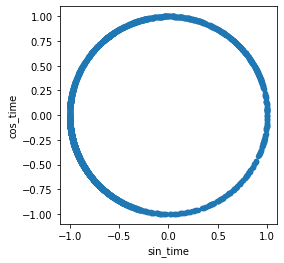

In [7]:
df.sample(5000).plot.scatter('sin_time','cos_time').set_aspect('equal')

In [8]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp', 'upvote_ratio', 'is_oc', 'permalink', 'name', 'is_self',
       'sin_time', 'cos_time'],
      dtype='object')

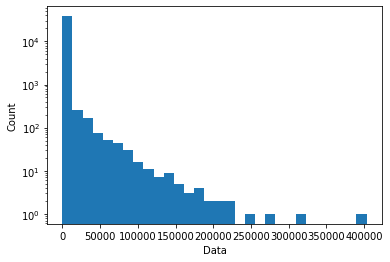

In [9]:
plt.hist(df['score'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data');

Text(0.5, 0, 'Data')

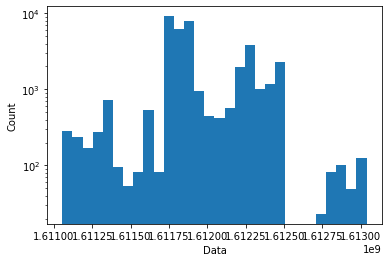

In [10]:
plt.hist(df['created'], bins=30)
plt.ylabel('Count')
plt.yscale('log')
plt.xlabel('Data')

Text processing

In [11]:
from collections import Counter
import string
import emoji
import re
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")

c:\users\artur\appdata\local\programs\python\python38\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\users\artur\appdata\local\programs\python\python38\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\users\artur\appdata\local\programs\python\python38\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\users\artur\appdata\local\programs\python\python38\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(
c:\users\artur\appdata\local\programs\python\python38\lib\site-packages\cupy\_environment.py:205: UserWarning: CUDA path cou

Most common words

In [12]:
try:
  df['body_lemmatized'] = pandas.read_pickle('../../pickle/body_lemmatized.pkl')
except:
  pass
try:
  df['title_lemmatized'] = pandas.read_pickle('../../pickle/title_lemmatized.pkl')
except:
  pass

In [13]:
# x = None
# try: 
#   x = pandas.read_pickle('gdrive/MyDrive/PED/title_lemmatized2.pkl')
# except:
#   pass
'title_lemmatized' in df

True

In [14]:
df['body_lemmatized'].head(5)

0    [trading, platform, disable, ability, buy, sel...
1                                                   []
2    [month, ago, find, big, dick, ,, thank, uk, ne...
3    [", apex, clearing, ,, act, custodian, tastywo...
4    [i\u2019ve, follow, couple, year, ..., start, ...
Name: body_lemmatized, dtype: object

In [15]:
if 'body_lemmatized' not in df: df['body_lemmatized'] = df['body'].apply(lambda x: [i.lemma_ for i in nlp(x.lower()) if (not i.is_stop) and len(i.lemma_) > 0])
if 'title_lemmatized' not in df: df['title_lemmatized'] = df['title'].apply(lambda x: [i.lemma_ for i in nlp(x.lower()) if (not i.is_stop) and len(i.lemma_) > 0])
# df['title_lemmatized'].to_pickle("gdrive/MyDrive/PED/title_lemmatized.pkl")

In [16]:
' '.join([' '.join(x) for x in img_text.values()])

'Palantir announces multi- million dollar deal with PG&E PLTR + SA News Today, 7:20 AM + 2 Comments Palantir Shows Fantastic Business Growth At 19-25x 2022 Sales PLTR + Lisbon Stock Picks + Today, 6:43 AM * 13 Comments      Ursula von der Leyen @ @vonderleyen Clean hydrogen will help us reconcile our economy with the health of our planet. That\'s the spirit of the #EUGreenDeal. We invest in hydrogen like never before and support out-of-the-box solutions, to make the EU climate- neutral by 2050. My address to @HydrogenCouncil Y Benzinga Pro\'s Top 5 Stocks To Watch For Tuesday, Jan. 19, 2021: NFLX, MRK, BB, WYNN, 8:33 am ET January 19, 2021 (Benzinga) = Print   Today\'s 5 Stock Ideas: Netflix (NFLX) - Will report Q4 earnings after market close Tuesday. Analysts expect earnings of $1.39 per share on sales of about $6.6 billion. results to be out around 4:01 m. EST. (BB) - last week’ s rally morning, up about 6%. Shares were up more ethan 25% last week. The stock has been chosen as a favo

In [17]:
len(img_text.keys())

10804

In [18]:
text_lens_no_0 = [len(x) for x in img_text.values() if len(x) > 0]
print('count', len(img_text))
print('no text in', len([len(x) for x in img_text.values() if len(x) == 0]), 'images')
print('min', np.min([len(x) for x in img_text.values()]))
print('max', np.max([len(x) for x in img_text.values()]))

print('q1', np.quantile(text_lens_no_0, 0.25))
print('median', np.median(text_lens_no_0))
print('q3', np.quantile(text_lens_no_0, 0.75))


count 10804
no text in 271 images
min 0
max 5008
q1 28.0
median 45.0
q3 65.0


In [19]:
words_separate = [' '.join(x).split(' ') for x in img_text.values()]

text_lens_no_0 = [len(x) for x in img_text.values() if len(x) > 0]
print('min', np.min([len(x) for x in words_separate]))
print('max', np.max([len(x) for x in words_separate]))
print('q1', np.quantile([len(x) for x in words_separate], 0.25))
print('median', np.median([len(x) for x in words_separate]))
print('q3', np.quantile([len(x) for x in words_separate], 0.75))


min 1
max 10010
q1 27.0
median 45.0
q3 67.0


In [20]:
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
img_most_common = Counter(word_tokenize(' '.join([' '.join(x) for x in img_text.values()])))
for key, cnts in list(img_most_common.items()):
  if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
    del img_most_common[key]
img_most_common = img_most_common.most_common(100)
img_most_common


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Artur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('GME', 6064),
 ('Today', 3634),
 ('Return', 3002),
 ('Total', 2863),
 ('AMC', 2777),
 ('Price', 2647),
 ('Value', 2636),
 ('GameStop', 2524),
 ('Cost', 2408),
 ('Market', 2314),
 ('1', 2151),
 ('A', 2108),
 ('4', 2107),
 ('Q', 2041),
 ('2', 1881),
 ('Shares', 1853),
 ('Buy', 1660),
 ('Volume', 1627),
 ('stock', 1623),
 ('shares', 1517),
 ('2021', 1489),
 ('Position', 1487),
 ('7', 1360),
 ('AM', 1311),
 ('Avg', 1259),
 ('Day', 1230),
 ('Your', 1228),
 ('Jan', 1209),
 ('Portfolio', 1207),
 ('Call', 1178),
 ('GAMESTOP', 1146),
 ('0.00', 1136),
 ('Open', 1111),
 ('USD', 1074),
 ('Trade', 1062),
 ('1M', 1034),
 ('3M', 1030),
 ('it', 1001),
 ('0', 999),
 ('Order', 973),
 ('Diversity', 970),
 ('5', 955),
 ('We', 941),
 ('BB', 918),
 ('price', 913),
 ('Exp', 904),
 ('100', 903),
 ('P/L', 896),
 ('PM', 894),
 ('Change', 888),
 ('View', 887),
 ('Gain', 884),
 ('Robinhood', 868),
 ('P', 858),
 ('market', 851),
 ('3', 848),
 ('The', 846),
 ('Last', 821),
 ('Quantity', 799),
 ('Symbol', 784),
 (

In [21]:
import pickle

In [22]:
body_most_common = None
try:
  body_most_common = pickle.load(open('../../pickle/body_most_common.pkl', "rb"))
except:
  pass

if body_most_common is None: body_most_common = Counter(df["body_lemmatized"].sum())



In [23]:
def prune(most_common_words):
  for key, cnts in list(most_common_words.items()):
    if not key in emoji.UNICODE_EMOJI and (not re.match(r'\w+',key) or len(key) < 2):
      del most_common_words[key]
  for i in ['don\\u2019', 'i\\u2019', 'it\\u2019s']:
    del most_common_words[i]
# body_most_common = body_most_common.most_common(100)
prune(body_most_common)
body_most_common.most_common(100)

[('gme', 10593),
 ('buy', 10520),
 ('stock', 10074),
 ('short', 9089),
 ('share', 8710),
 ('go', 6597),
 ('like', 6593),
 ('hold', 6343),
 ('market', 6108),
 ('sell', 6081),
 ('price', 5494),
 ('know', 5266),
 ('people', 5044),
 ('money', 4641),
 ('think', 4007),
 ('time', 3952),
 ('fuck', 3879),
 ('company', 3843),
 ('amc', 3803),
 ('get', 3724),
 ('robinhood', 3677),
 ('day', 3675),
 ('want', 3647),
 ('fund', 3482),
 ('good', 3380),
 ('trade', 3097),
 ('squeeze', 3004),
 ('new', 2945),
 ('hedge', 2941),
 ('need', 2929),
 ('post', 2794),
 ('look', 2784),
 ('let', 2764),
 ('try', 2755),
 ('position', 2746),
 ('big', 2687),
 ('year', 2685),
 ('right', 2529),
 ('fucking', 2498),
 ('lose', 2495),
 ('financial', 2494),
 ('come', 2477),
 ('happen', 2450),
 ('long', 2433),
 ('way', 2396),
 ('say', 2356),
 ('high', 2294),
 ('week', 2249),
 ('see', 2183),
 ('trading', 2173),
 ('account', 2104),
 ('start', 2103),
 ('guy', 2094),
 ('retard', 2076),
 ('thing', 2064),
 ('investor', 1997),
 ('today

In [24]:
title_most_common = None
try:
  title_most_common = pickle.load(open('../../pickle/title_most_common.pkl', "rb"))
except:
  pass

if title_most_common is None: title_most_common = Counter(df["title_lemmatized"].sum())

# title_most_common = Counter(df["title_lemmatized"].sum())
# for key, cnts in list(title_most_common.items()):
#   if not key in emoji.UNICODE_EMOJI and (key in stopwords.words('english') or not re.match(r'\w+',key)):
#     del title_most_common[key]
# title_most_common = title_most_common.most_common(100)
prune(title_most_common)
title_most_common.most_common(100)

[('gme', 8569),
 ('buy', 5702),
 ('hold', 5090),
 ('amc', 4132),
 ('robinhood', 3060),
 ('sell', 2616),
 ('nok', 2338),
 ('stock', 2167),
 ('bb', 2047),
 ('let', 1843),
 ('moon', 1727),
 ('go', 1692),
 ('share', 1586),
 ('short', 1487),
 ('fuck', 1293),
 ('like', 1214),
 ('dip', 1082),
 ('market', 1045),
 ('get', 1006),
 ('today', 977),
 ('retard', 973),
 ('time', 880),
 ('stop', 879),
 ('guy', 873),
 ('fucking', 803),
 ('wsb', 802),
 ('not', 792),
 ('money', 790),
 ('trading', 780),
 ('trade', 767),
 ('line', 738),
 ('new', 722),
 ('need', 718),
 ('fund', 709),
 ('good', 690),
 ('hand', 682),
 ('squeeze', 681),
 ('loss', 677),
 ('day', 662),
 ('know', 658),
 ('gamestop', 658),
 ('app', 653),
 ('people', 649),
 ('hedge', 648),
 ('rh', 633),
 ('be', 632),
 ('want', 626),
 ('right', 615),
 ('think', 608),
 ('try', 587),
 ('boy', 586),
 ('look', 557),
 ('price', 543),
 ('big', 536),
 ('lose', 532),
 ('post', 523),
 ('account', 514),
 ('yolo', 492),
 ('strong', 490),
 ('happen', 476),
 ('h

Parameters creation

In [25]:
additional_keywords = ['gme', 'hold', 'buy', 'retard', 'wife', 'hedgies', '🚀', 'moon','🧻','🙏', '💎', '🤲','✋','🙌🏼', '🦍', '👋🏼']
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
text_attributes = {}
for key in additional_keywords: 
  text_attributes['title_' + key] =  df["title_lemmatized"].apply(lambda x: x.count(key))
  text_attributes['body_' + key] = df["body_lemmatized"].apply(lambda x: x.count(key))




In [26]:
 df["title_lemmatized"].head(5).apply(lambda x: x.count('retard'))

0    0
1    0
2    0
3    0
4    0
Name: title_lemmatized, dtype: int64

In [27]:
for key, cnts in body_most_common.most_common(100): 
  text_attributes['body_' + key.lower()] = df["body_lemmatized"].apply(lambda x: x.count(key))


for key, cnts in title_most_common.most_common(100): 
  text_attributes['title_' + key.lower()] = df["title_lemmatized"].apply(lambda x: x.count(key))


In [28]:

text_attributes['body_punctuation'] = df['body'].apply(lambda s: count(s, string.punctuation))
text_attributes['title_punctuation'] = df['title'].apply(lambda s: count(s, string.punctuation))

text_attributes['body_cap_ratio'] = df['body'].str.count(r'[A-Z]')/df['body'].str.count(r'[a-zA-Z]')
text_attributes['title_cap_ratio'] = df['title'].str.count(r'[A-Z]')/df['title'].str.count(r'[a-zA-Z]')

text_attributes['time_of_day'] = pandas.to_datetime(df['timestamp']).dt.hour + pandas.to_datetime(df['timestamp']).dt.minute/60

text_attributes['title_length'] = df['title'].apply(len)
text_attributes['title_non_alphanumeric_ratio'] = df['title'].str.count(r'[^A-Za-z0-9]')/df['title'].apply(len)


In [29]:
def regex_count_in_url_and_body(regex):
    return df['body'].apply(lambda s: len(re.findall(regex, s))) + df['url'].apply(lambda s: len(re.findall(regex, s)))

In [30]:
text_attributes['link'] = regex_count_in_url_and_body(r'(https?://[^\s]+)')
text_attributes['reddit_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?redd\.?it[^\s]+)')
text_attributes['yt_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?youtu\.?be[^\s]+)')
text_attributes['tweet_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?twitter[^\s]+)')
text_attributes['facebook_link'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?facebook[^\s]+)')

text_attributes['gif'] = regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?giphy[^\s]+)') + regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?gifyu[^\s]+)') + regex_count_in_url_and_body(r'(https?:\/\/w?w?w?\.?gfycat[^\s]+)') + df['url'].apply(lambda s: len(re.findall(r'(\.gif)', s)))

text_attributes = pandas.DataFrame(text_attributes)
text_attributes
df[text_attributes['gif']>=1]

,title,score,id,url,comms_num,created,body,timestamp,upvote_ratio,is_oc,permalink,name,is_self,sin_time,cos_time,body_lemmatized,title_lemmatized
274,The battle of 01/22/21,31,l2vozj,https://i.redd.it/9dj6b0fbwxc61.gif,3,1.611346e+09,,Fri Jan 22 21:00:25 2021,0.88,False,/r/wallstreetbets/comments/l2vozj/the_battle_o...,t3_l2vozj,False,-0.865115,0.501574,[],"[battle, 01/22/21]"
377,The Big Short Squeeze,687,l2ysvu,https://i.redd.it/ratl459cnyc61.gif,26,1.611355e+09,,Fri Jan 22 23:32:00 2021,0.97,False,/r/wallstreetbets/comments/l2ysvu/the_big_shor...,t3_l2ysvu,False,-0.374607,0.927184,[],"[big, short, squeeze]"
503,Y Tú robinhood?,5,l6z8in,https://i.redd.it/4lw7x9ifa3e61.gif,0,1.611847e+09,,Thu Jan 28 16:12:50 2021,1.00,False,/r/wallstreetbets/comments/l6z8in/y_tú_robinhood/,t3_l6z8in,False,-0.745573,-0.666424,[],"[y, tú, robinhood, ?]"
597,"57.19... Not great, not terrible",19,lcpar2,https://i.redd.it/tuvocw1ptif61.gif,1,1.612471e+09,,Thu Feb 4 21:31:26 2021,0.91,False,/r/wallstreetbets/comments/lcpar2/5719_not_gre...,t3_lcpar2,False,-0.789531,0.613711,[],"[57.19, ..., great, ,, terrible]"
860,Put exactly $1 into GME on Thursday because it...,1,lb6x64,https://i.pinimg.com/originals/82/bd/6a/82bd6a...,0,1.612301e+09,,Tue Feb 2 22:27:10 2021,1.00,False,/r/wallstreetbets/comments/lb6x64/put_exactly_...,t3_lb6x64,False,-0.618523,0.785767,[],"[exactly, $, 1, gme, thursday, free, investing..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38261,Attention on deck! This is for you new people...,2129,l7oc8o,https://gfycat.com/showygrimyamberpenshell,88,1.611912e+09,,Fri Jan 29 10:26:40 2021,0.99,False,/r/wallstreetbets/comments/l7oc8o/attention_on...,t3_l7oc8o,False,0.620235,-0.784416,[],"[attention, deck, !, new, people, ...]"
38363,"Looks like a pleasant day, can't wait for tomo...",21,lckl3w,https://giphy.com/gifs/girl-horror-creepy-aOPI...,0,1.612459e+09,,Thu Feb 4 18:14:23 2021,0.87,False,/r/wallstreetbets/comments/lckl3w/looks_like_a...,t3_lckl3w,False,-0.980257,-0.197729,[],"[look, like, pleasant, day, ,, wait, tomorrow, !]"
38606,Me holding my GME shares no matter what,592,lci7es,https://i.redd.it/6vt1tp4qchf61.gif,16,1.612453e+09,,Thu Feb 4 16:34:40 2021,0.95,False,/r/wallstreetbets/comments/lci7es/me_holding_m...,t3_lci7es,False,-0.805584,-0.592482,[],"[hold, gme, share, matter]"
38825,How I feel holding my $GME shares on RobbingHood,392,l8bxhr,https://i.redd.it/keehwjjivde61.gif,52,1.611975e+09,,Sat Jan 30 03:48:47 2021,0.98,False,/r/wallstreetbets/comments/l8bxhr/how_i_feel_h...,t3_l8bxhr,False,0.671667,0.740853,[],"[feel, hold, $, gme, share, robbinghood]"


In [31]:
text_attributes.describe()

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,title_cap_ratio,time_of_day,title_length,title_non_alphanumeric_ratio,link,reddit_link,yt_link,tweet_link,facebook_link,gif
count,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,...,38784.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000
mean,0.220237,0.272258,0.130821,0.163026,0.146551,0.270381,0.025008,0.053357,0.002493,0.008841,...,0.297844,16.240666,56.324766,0.223881,1.200550,0.694587,0.010461,0.013956,0.000026,0.007351
std,0.451059,0.966169,0.497768,0.623948,0.445572,1.095647,0.161491,0.352820,0.050382,0.110255,...,0.347737,5.014017,45.491139,0.097543,1.359619,0.833473,0.111158,0.148451,0.005070,0.085722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.060000,15.766667,25.000000,0.176471,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,17.233333,43.000000,0.212121,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.347826,18.516667,73.000000,0.254902,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,20.000000,30.000000,31.000000,29.000000,30.000000,114.000000,3.000000,33.000000,2.000000,3.000000,...,1.000000,23.983333,300.000000,1.000000,53.000000,26.000000,6.000000,10.000000,1.000000,2.000000


In [32]:
df.describe()

,score,comms_num,created,upvote_ratio,sin_time,cos_time
count,38908.000000,38908.000000,3.890800e+04,38908.000000,38908.000000,38908.000000
mean,1067.872725,163.334456,1.611946e+09,0.850445,-0.633535,-0.172791
std,8307.818756,2618.259934,2.937302e+05,0.177901,0.495768,0.568335
min,0.000000,0.000000,1.611054e+09,0.000000,-1.000000,-1.000000
25%,7.000000,2.000000,1.611770e+09,0.780000,-0.951130,-0.624448
50%,22.000000,7.000000,1.611849e+09,0.920000,-0.818359,-0.316891
75%,102.000000,23.000000,1.612209e+09,0.980000,-0.591002,0.177299
max,403161.000000,97996.000000,1.613038e+09,1.000000,1.000000,1.000000


In [33]:
for i in ['score', 'sin_time', 'cos_time']:
  text_attributes[i] = df[i]  
text_attributes['day'] = pandas.to_datetime(df['timestamp']).dt.day
text_attributes['month'] = pandas.to_datetime(df['timestamp']).dt.month
text_attributes.describe()

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,reddit_link,yt_link,tweet_link,facebook_link,gif,score,sin_time,cos_time,day,month
count,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,...,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000,38908.000000
mean,0.220237,0.272258,0.130821,0.163026,0.146551,0.270381,0.025008,0.053357,0.002493,0.008841,...,0.694587,0.010461,0.013956,0.000026,0.007351,1067.872725,-0.633535,-0.172791,20.427830,1.281099
std,0.451059,0.966169,0.497768,0.623948,0.445572,1.095647,0.161491,0.352820,0.050382,0.110255,...,0.833473,0.111158,0.148451,0.005070,0.085722,8307.818756,0.495768,0.568335,11.168385,0.449541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-0.951130,-0.624448,4.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,22.000000,-0.818359,-0.316891,27.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,102.000000,-0.591002,0.177299,28.000000,2.000000
max,20.000000,30.000000,31.000000,29.000000,30.000000,114.000000,3.000000,33.000000,2.000000,3.000000,...,26.000000,6.000000,10.000000,1.000000,2.000000,403161.000000,1.000000,1.000000,31.000000,2.000000


In [34]:
print(pandas.to_datetime(df['timestamp'].head(10)))
print(pandas.to_datetime(df['timestamp'].head(10)).dt.day)
print(pandas.to_datetime(df['timestamp'].head(10)).dt.month)

0   2021-01-27 18:18:38
1   2021-01-30 00:12:20
2   2021-02-04 06:17:59
3   2021-01-28 17:35:13
4   2021-01-28 16:45:57
5   2021-01-28 16:42:29
6   2021-02-03 21:17:48
7   2021-01-27 18:06:55
8   2021-01-28 17:18:51
9   2021-01-25 15:54:30
Name: timestamp, dtype: datetime64[ns]
0    27
1    30
2     4
3    28
4    28
5    28
6     3
7    27
8    28
9    25
Name: timestamp, dtype: int64
0    1
1    1
2    2
3    1
4    1
5    1
6    2
7    1
8    1
9    1
Name: timestamp, dtype: int64


In [35]:
print(re.findall('http','ahttpjkshdoifjdshttp'))
print()
print(re.findall(r"https?://(?:(?:[^\s()])|(?:\(\S*\)]*\)))+", 'https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator(dupa=dupa()))'))

['http', 'http']

['https://www.benzinga.com/government/21/01/19337399/something-systemically-wrong-with-gamestop-options-trading-says-massachusetts-securities-regulator(dupa=dupa()))']


In [36]:
text_attributes['body_🙏'].describe()
text_attributes['score'].min() == text_attributes['score'].max() 

False

In [37]:
to_be_removed = []
for column in text_attributes:
  if text_attributes[column].min() == text_attributes[column].max():
    to_be_removed.append(column)
len(to_be_removed) # 11

11

In [38]:
for i in to_be_removed:
  del text_attributes[i]

<AxesSubplot:>

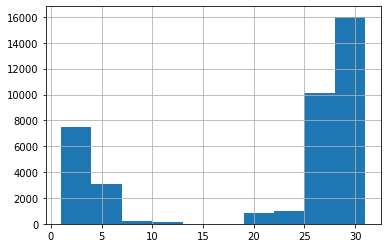

In [39]:
text_attributes['day'].hist()


In [40]:
text_attributes['day'] = text_attributes['day'].apply(lambda x: x+(31-19) if x < 19 else x-19)

In [41]:
del text_attributes['month']

In [42]:
del text_attributes['time_of_day']

In [43]:
# for column in text_attributes:
#     print(column, text_attributes[column].corr(df['score']))

Korelacja

In [44]:
corrMatrix = text_attributes.corr(method='spearman')

In [45]:
corrMatrixSave = corrMatrix.copy()

In [46]:
x = corrMatrix['score'][corrMatrix['score']<1]
print(x.min(), x.keys()[x.argmin()])
print(x.max(), x.keys()[x.argmax()])
# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   print(x.sort_values())


-0.3164624612070298 reddit_link
0.2924616172013145 day


In [47]:
treshold = .5
for i,column in enumerate(corrMatrix):
  x = corrMatrix[column][i+1:]
  if x.min() < -treshold:
    print(x.min(), column, x.keys()[x.argmin()])
  if x.max() > treshold:
    print(x.max(), column, x.keys()[x.argmax()])

0.8126767554236412 body_fund body_hedge
0.5900671053157261 body_financial body_advice
0.5123402249085042 body_investor body_retail
0.8415616564908381 title_fund title_hedge
0.7017658229852384 title_hand title_diamond
0.8675823406225365 title_wall title_street
0.6769169227183498 body_punctuation reddit_link
0.586348918053493 title_punctuation title_length


In [48]:
treshold = .5
correlations = []
for i,column in enumerate(corrMatrix):
  x = corrMatrix[column][i+1:]
  for row,v in x.items():
    correlations.append([v,column,row])
correlations.sort(key = lambda x: -abs(x[0]))

In [49]:
len(correlations)

25651

In [50]:
correlations.sort(key = lambda x: -abs(x[0]))

In [51]:
len(text_attributes.columns)

227

In [52]:
text_attributes2 = text_attributes.copy()

In [53]:
text_attributes = text_attributes2.copy()

In [54]:
score_corr = corrMatrix['score'][corrMatrix['score']<1]
for corr in correlations:
  if len(text_attributes.columns) <= 30: break
  c,a1,a2 = corr
  if 'score' in [a1,a2]: continue
  if a1 in text_attributes and a2 in text_attributes:
    to_be_removed = a1 if score_corr[a1] < score_corr[a2] else a2
    del text_attributes[to_be_removed]

In [55]:
text_attributes

,title_retard,body_wife,title_hedgies,title_🧻,title_🙏,title_stop,title_need,title_good,title_squeeze,title_people,...,title_long,title_option,title_take,title_support,title_join,title_sec,tweet_link,gif,score,day
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,8
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1157,11
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,16
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
38904,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16,9
38905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,77,9
38906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [56]:
text_attributes.columns

Index(['title_retard', 'body_wife', 'title_hedgies', 'title_🧻', 'title_🙏',
       'title_stop', 'title_need', 'title_good', 'title_squeeze',
       'title_people', 'title_hedge', 'title_be', 'title_right', 'title_think',
       'title_order', 'title_way', 'title_week', 'title_say', 'title_love',
       'title_wall', 'title_long', 'title_option', 'title_take',
       'title_support', 'title_join', 'title_sec', 'tweet_link', 'gif',
       'score', 'day'],
      dtype='object')

In [57]:
score_corr_text = corrMatrix['score']
lista1=[]
for i in text_attributes.columns:
  lista1.append([score_corr_text[i], i])
  # print('{:10.5f}'.format(score_corr[i]), class_dict[int(i)])
lista1.sort(key=lambda x: -abs(x[0]))
for i in lista1:
  print('{:10.5f}'.format(i[0]), i[1])

   1.00000 score
   0.29246 day
   0.06297 gif
   0.04893 title_week
   0.04183 title_hedge
   0.04122 tweet_link
  -0.03930 title_order
   0.03756 body_wife
   0.03744 title_retard
   0.03686 title_be
   0.03644 title_squeeze
   0.02932 title_say
   0.02838 title_sec
   0.02482 title_🧻
   0.02189 title_love
   0.02081 title_wall
   0.01213 title_way
   0.01073 title_stop
   0.01037 title_think
   0.00891 title_🙏
   0.00769 title_right
   0.00701 title_long
  -0.00603 title_need
   0.00602 title_hedgies
   0.00435 title_support
  -0.00407 title_good
   0.00389 title_people
  -0.00276 title_join
  -0.00255 title_option
   0.00085 title_take


In [58]:
corrMatrix

,title_gme,body_gme,title_hold,body_hold,title_buy,body_buy,title_retard,body_retard,title_wife,body_wife,...,link,reddit_link,yt_link,tweet_link,facebook_link,gif,score,sin_time,cos_time,day
title_gme,1.000000,0.114992,0.039027,0.040322,0.152904,0.054120,0.000140,0.024865,-0.004081,0.003124,...,0.020214,0.049949,-0.007440,0.008523,-0.002624,0.005215,0.052654,0.010437,-0.008933,-0.028057
body_gme,0.114992,1.000000,-0.068991,0.308922,-0.034508,0.379697,-0.014123,0.206848,-0.015538,0.099668,...,0.190116,0.321330,-0.008921,0.021125,-0.002158,-0.036561,0.030009,0.046133,0.020240,0.046492
title_hold,0.039027,-0.068991,1.000000,0.054699,0.078873,-0.058883,0.042424,-0.034455,0.006130,-0.015190,...,-0.059763,-0.109587,-0.005320,-0.027386,-0.001791,0.003985,0.129255,0.010869,-0.005297,0.115735
body_hold,0.040322,0.308922,0.054699,1.000000,-0.037455,0.330522,-0.011055,0.193713,-0.012018,0.085632,...,0.127467,0.259784,-0.000842,0.006975,-0.001743,-0.029538,0.073360,0.052338,0.010494,0.117176
title_buy,0.152904,-0.034508,0.078873,-0.037455,1.000000,0.057364,0.033032,-0.030775,0.005410,-0.022716,...,-0.058877,0.023192,-0.029857,-0.028271,-0.001954,-0.020700,-0.006090,-0.028167,-0.066128,0.018941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gif,0.005215,-0.036561,0.003985,-0.029538,-0.020700,-0.036133,0.004104,-0.017336,0.001803,-0.007418,...,-0.025716,-0.116937,-0.008554,-0.009529,-0.000435,1.000000,0.062974,0.027354,0.030421,0.024682
score,0.052654,0.030009,0.129255,0.073360,-0.006090,0.014423,0.037441,0.055023,0.023522,0.037565,...,0.100542,-0.316462,0.002254,0.041220,-0.002770,0.062974,1.000000,0.253659,0.186737,0.292462
sin_time,0.010437,0.046133,0.010869,0.052338,-0.028167,0.040552,-0.001641,0.047872,0.014335,0.035754,...,0.075301,-0.105107,0.007297,0.027970,-0.000259,0.027354,0.253659,1.000000,-0.116081,0.354365
cos_time,-0.008933,0.020240,-0.005297,0.010494,-0.066128,-0.011507,0.013025,0.044016,0.014737,0.030348,...,0.062536,-0.116324,0.029255,0.018929,-0.003471,0.030421,0.186737,-0.116081,1.000000,0.058128


Obróbka atrybutów ze zdjęć

In [59]:
img_class = pickle.load(open("../../pickle/image_classes.pkl", "rb"))
img_clusters = pickle.load(open("../../pickle/image_color_clusters.pkl", "rb"))
img_means = pickle.load(open("../../pickle/image_hsv_means.pkl", "rb"))

pic_data = {}
pic_data['id'] = []
pic_data['text'] = []
pic_data['probabilities'] = []
pic_data['clusters'] = []
pic_data['means'] = []

for key in img_class.keys():
  pic_data['id'].append(key)
  pic_data['text'].append(" ".join(img_text[key[:-4]]))
  pic_data['probabilities'].append(img_class[key])
  pic_data['clusters'].append(img_clusters[key])
  pic_data['means'].append(img_means[key])

pic_data = pandas.DataFrame(pic_data)
pic_data

pic_attributes = {'id': []}
for key, cnts in img_most_common: 
  pic_attributes['id'].append(key)
  pic_attributes['text_' + key] =  pic_data['text'].str.lower().str.count(key.lower())


In [60]:
img_clusters = pickle.load(open("../../pickle/image_color_clusters.pkl", "rb"))
img_means = pickle.load(open("../../pickle/image_hsv_means.pkl", "rb"))

pic_data = {}
pic_data['id'] = []
pic_data['text'] = []
pic_data['probabilities'] = []
pic_data['clusters'] = []
pic_data['means'] = []

for key in img_means.keys():
  pic_data['id'].append(key)
  pic_data['text'].append(" ".join(img_text[key[:-4]]))
  pic_data['probabilities'].append(img_class[key])
  pic_data['clusters'].append(img_clusters[key])
  pic_data['means'].append(img_means[key])

pic_data = pandas.DataFrame(pic_data)

pic_attributes = {'id': pic_data['id']}
for key, cnts in img_most_common: 
  pic_attributes['text_' + key] =  pic_data['text'].str.lower().str.count(key.lower())

pic_attributes['h_sin'] = pic_data['means'].apply(lambda s:  np.sin(2*np.pi*(s[0]/255)))
pic_attributes['h_cos'] = pic_data['means'].apply(lambda s:  np.sin(2*np.pi*(s[0]/255)))
pic_attributes['s'] = pic_data['means'].apply(lambda s: s[1]/255)
pic_attributes['v'] = pic_data['means'].apply(lambda s: s[2]/255)

for j in range(5):
  for i in range(3):
    pic_attributes['color_'+str(j)+'_'+'rgb'[i]] = pic_data['clusters'].apply(lambda s: s['color'][j][i])
  pic_attributes['color_'+str(j)+'_%'] = pic_data['clusters'].apply(lambda s: s['percentage'][j])

pic_attributes = pandas.DataFrame(pic_attributes)
print(pic_attributes)

               id  text_GME  text_Today  text_Return  text_Total  text_AMC  \
0      l0j2uy.jpg         0           2            0           0         0   
1      l0jw5j.png         0           0            0           0         0   
2      l0k6vs.jpg         0           1            0           0         0   
3      l0k7wq.jpg         0           0            0           0         0   
4      l0khnn.jpg         0           0            0           0         0   
...           ...       ...         ...          ...         ...       ...   
10799  lh8j7j.jpg         0           2            2           1         0   
10800  lh9q18.jpg         0           2            2           1         0   
10801  lh9t7w.png         0           6            6           3         0   
10802  lhaeyc.png         0           2            2           1         0   
10803  lhcqjk.png         0           0            0           0         0   

       text_Price  text_Value  text_GameStop  text_Cost  ...   